<a href="https://colab.research.google.com/github/liangkelei/colab_projects/blob/main/prototype_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries
Libraries installed across the board: googlemaps (google-maps-services-python), polyline, gmaps (jupyter-gmaps), pykml, Pillow, geotable, bs4

In [ ]:
pip install -U googlemaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googlemaps: filename=googlemaps-4.7.3-py3-none-any.whl size=40341 sha256=521e84f7245c79d7e98eec5ca0e2db857ddc3881801ae61a9bb60df87b4add0e
  Stored in directory: /root/.cache/pip/wheels/e0/57/cc/329195e1c9e5b7d270fba4671c451d111d08f7b7ef56f8ec30
Successfully built googlemaps


In [ ]:
pip install polyline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gmaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 17.2 MB/s 
     |████████████████████████████████| 1.6 MB 48.7 MB/s 
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076110 sha256=38abd807a77777ba8268e1e99c430dbc11597bf0284d1d5141bcf4e10ef6a1cf
  Stored in directory: /root/.cache/pip/wheels/30/bd/87/d0d731ee712c34a4d6bace8b1dbf8c8932e22a1625b4a55be4
Successfully built gmaps


In [ ]:
pip install pykml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 134 kB/s 


In [ ]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U geotable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 19.0 MB/s 
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=d2c45ce69b4d979be2ec16e19457a83524a332e009ccbdf1424f1ff32901cc6a
  Stored in directory: /root/.cache/pip/wheels/65/e2/d8/878a8cc986641056fbfebefc4d8eb64238a7b6d3426e86b447
Successfully built utm


In [ ]:
pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Strategy 1
In this strategy, we use a combination of different libraries to work with Google Maps in different ways. These libraries serve different purposes, from making calls to the Directions API to decoding polylines. The end result thus far is a Google Map with markers denoting points along the path.

Updates:


*   Get user input on start & end addresses ✅
*   Make directions request with googlemaps ✅
*   Decode overview_polyline to get path coordinates ✅
*   Display map & markers along path ✅

### Get user input
Here, we use the input() function to get user input on a start address and end address for their desired directions. In future iterations of this prototype, the ipywidgets library may be utilized and further user input may be taken on items like travel mode.

In [ ]:
start_address = input("Enter starting address: ")

end_address = input("Enter destination: ")

Enter starting address: 639 Halcyon Meadow Dr.
Enter destination: Green Hope Elementary


### Make directions request
Use the googlemaps (google-maps-services-python) library to make a directions request. Note that this library only works in data/response API calls to the Google Maps API, and does not create visual displays of the map.

In [ ]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='INSERT API KEY')

# Request directions
now = datetime.now()
directions_result = gmaps.directions(start_address,
                                     end_address,
                                     mode="bicycling",
                                     departure_time=now)

# Store overview_polyline.points
overview_polyline = directions_result[0]["overview_polyline"]["points"]

### Decode polyline
Because direct calls to the Directions API do not provide an overview_path (list of latlngs of points along the path), we decode the overview_polyline into that.

In [ ]:
import polyline

# Decode the polyline to get a list of coordinates
path_coordinates = polyline.decode(overview_polyline)

### Display map
Using the jupyter-gmaps library, we now can create a Google Maps visual and add layers on top of it. In this case, a layer of the markers along the directions path.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import gmaps

# Configure authentication
gmaps.configure(api_key="INSERT API KEY")

fig = gmaps.figure()
marker_layer = gmaps.marker_layer(path_coordinates)
bicycling_layer = gmaps.bicycling_layer()
fig.add_layer(marker_layer)
fig.add_layer(bicycling_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Strategy 2
Using the jupyter-gmaps library, we can both work with the Directions API and display the map with those directions. One thing to note is that the start and end locations MUST be provided in the form of latlngs.

Updates:


*   Taking user input on travel mode ✅
*   Use gmaps to call the Directions API ✅
*   Display bike path layer & transit layer ✅


Future considerations:
*   Displaying multiple possible paths
*   Crowdsourced reviews of accessibility
*   Photos of trails
*   Using ipywidgets for user input
*   Present existing data on bike routes & commentary from the KML file
*   Streetview option


### Get user input
Still using the input() function, we are getting user input on start and end addresses, as well as a travel mode (bicycling or transit).

In [ ]:
start_address = input("Enter starting address: ")
end_address = input("Enter destination: ")
travel_mode = input("Enter travel mode (BICYCLING, TRANSIT): ")

Enter starting address: 639 Halcyon Meadow Dr.
Enter destination: Green Hope Elementary
Enter travel mode (BICYCLING, TRANSIT): BICYCLING


### Get the latlng of start and end addresses
To get the latitude and longitude of each user-inputted address, we are using the geocode function that is part of the Google Maps API.

In [ ]:
import googlemaps

from datetime import datetime

gmaps = googlemaps.Client(key='INSERT API KEY')

# Geocoding start and end addresses
start_geocode = gmaps.geocode(start_address)
end_geocode = gmaps.geocode(end_address)
print(start_geocode)
print(end_geocode)

# Store the latitude and longitude of each address
start_coord = (start_geocode[0]["geometry"]["location"]["lat"], start_geocode[0]["geometry"]["location"]["lng"])
end_coord = (end_geocode[0]["geometry"]["location"]["lat"], end_geocode[0]["geometry"]["location"]["lng"])

[{'address_components': [{'long_name': '639', 'short_name': '639', 'types': ['street_number']}, {'long_name': 'Halcyon Meadow Drive', 'short_name': 'Halcyon Meadow Dr', 'types': ['route']}, {'long_name': 'Carramore', 'short_name': 'Carramore', 'types': ['neighborhood', 'political']}, {'long_name': 'Cary', 'short_name': 'Cary', 'types': ['locality', 'political']}, {'long_name': 'Wake County', 'short_name': 'Wake County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'North Carolina', 'short_name': 'NC', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '27519', 'short_name': '27519', 'types': ['postal_code']}, {'long_name': '7701', 'short_name': '7701', 'types': ['postal_code_suffix']}], 'formatted_address': '639 Halcyon Meadow Dr, Cary, NC 27519, USA', 'geometry': {'bounds': {'northeast': {'lat': 35.7988252, 'lng': -78.8542914}, 'southwest': {'lat': 35.7986

### Get directions and display map
Here, we'll use the jupyter-gmaps library to display a map with both a directions layer and a layer based on the user-selected travel mode.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

import gmaps

# Configure authentication
gmaps.configure(api_key="INSERT API KEY")

fig = gmaps.figure()

directions = gmaps.directions_layer(start_coord, end_coord, travel_mode=travel_mode)
fig.add_layer(directions)

# Add transit or bicycling layer
if travel_mode == "BICYCLING":
  fig.add_layer(gmaps.bicycling_layer())
elif travel_mode == "TRANSIT":
  fig.add_layer(gmaps.transit_layer())

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Strategy 3
This was a failed attempt at displaying multiple routes, but instead I found another way of displaying a directions path. This time the map and route is displayed in a Static Map image. The process combines aspects of Strategies 1 & 2.

### Get directions
This is the same as in Strat 1. Using the googlemaps library, we get the directions between the start and end addresses provided by the user.

In [ ]:
import googlemaps

map_3 = googlemaps.Client(key='INSERT API KEY')

# Request directions
now = datetime.now()
directions_result = map_3.directions(start_address,
                                     end_address,
                                     mode="bicycling",
                                     departure_time=now)

# Store overview_polyline.points
overview_polyline = directions_result[0]["overview_polyline"]["points"]

### Turn polyline into list of coordinates (string)
To use this in the static map to create a line, we must take the overview_polyline provided by the Directions API and turn it into a list of strings in the format of "lat, lng".

In [ ]:
import polyline

# Decode the polyline to get a list of coordinates
path_coordinates = polyline.decode(overview_polyline)

# Turn coordinates into strings ("lat, lng")
def coordToString(coord):
    return str(coord[0]) + ", " + str(coord[1])
  
path = map(coordToString, path_coordinates)

### Create jpg image of map
We make a Static Map that displays the start and end markers as well as a line connecting the points along the path.

In [ ]:
# Create the markers for start and end addresses  
markers = ["color:blue|size:mid|label:" + chr(65+i) + "|" + r for i, r in enumerate([start_address, end_address])]

# Create the map
result_map = map_3.static_map(
                 center=path[0],
                 scale=2, 
                 zoom=14,
                 size=[500, 300], 
                 format="jpg", 
                 maptype="roadmap",
                 markers=markers,
                 path="color:0x0000ff|weight:2|" + "|".join(path))

# Write the map into a jpg image
with open("image.jpg", "wb") as img:
    for chunk in result_map:
        img.write(chunk)

TypeError: ignored

### Display the image
Using the Pillow library, we can display the image of the map.

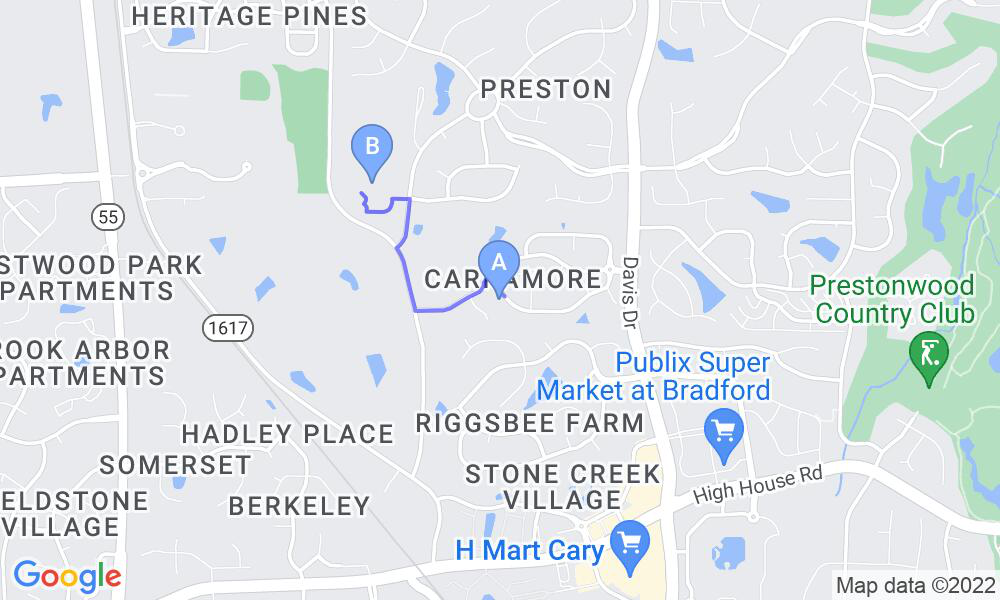

In [ ]:
from PIL import Image

Image.open('image.jpg')

# Strategy 4
The Chapel Hill Database includes a KMZ file that contains information about bike lanes and includes crowdsourced commentary on the conditions of these lanes. It would be useful as a starting point for reviews of the lane quality.

### Work with the kml file using pykml
- upload the kmz file to this project
- unzip to the doc.kml file within
- interpret the doc.kml using pykml

In [ ]:
'''from pykml import parser
with open('test.kml', 'r') as kml_file:
  root = parser.parse(kml_file).getroot()
  for i in root.findall('{http://www.opengis.net/kml/2.2}Document/{http://www.opengis.net/kml/2.2}Placemark/{http://www.opengis.net/kml/2.2}Point'):
    print(i.coordinates)'''

### Work with KMZ file using geotable
The geotable library is able to format the KMZ file into a table format. However, it does not include the External Data components.

In [ ]:
import geotable

t = geotable.load('/content/drive/MyDrive/Chapel_Hill_Bike_Map.20160505_line.kmz')

t

,Name,geometry_object,geometry_layer,geometry_proj4
0,Route I'd like to walk if...,LINESTRING Z (-79.0344639683172 35.92943202681...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
1,Route I'd like to ride if...,LINESTRING Z (-79.0720799965477 35.95171199427...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
2,Route I'd like to ride if...,LINESTRING Z (-79.0322969628233 35.92634700785...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
3,Route I'd like to ride if...,LINESTRING Z (-79.0322969628233 35.92634700785...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
4,Route I'd like to ride if...,LINESTRING Z (-79.0322969628233 35.92634700785...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
...,...,...,...,...
99,Route I'd like to ride if...,LINESTRING Z (-79.0033495461975 35.94440908198...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
100,Route I'd like to ride if...,LINESTRING Z (-79.0128780338212 35.94203602071...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
101,Route I'd like to ride if...,LINESTRING Z (-79.0189079758245 35.90650197343...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs
102,Route I'd like to ride if...,LINESTRING Z (-79.0143590253135 35.89367399903...,Chapel Hill Bike Map.20160505,+proj=longlat +datum=WGS84 +no_defs


### Work with KMZ file by unzipping to doc.kml
This method uses the zipfile library to unzip the KMZ file and read the html-format contents.

In [ ]:
from zipfile import ZipFile

kmz = ZipFile("/content/drive/MyDrive/Chapel_Hill_Bike_Map.20160505_line.kmz", 'r')
kml = kmz.open('doc.kml', 'r').read()

kml

b'<?xml version="1.0" encoding="UTF-8"?>\n<kml xmlns="http://www.opengis.net/kml/2.2">\n  <Document>\n    <Style id="style0">\n      <LineStyle>\n        <color>ff00ffff</color>\n        <width>4</width>\n      </LineStyle>\n    </Style>\n    <Style id="style1">\n      <LineStyle>\n        <color>ff56ff56</color>\n        <width>4</width>\n      </LineStyle>\n    </Style>\n    <Schema id="schema0" name="schema0">\n      <SimpleField name="id" type="int"></SimpleField>\n      <SimpleField name="user_id" type="int"></SimpleField>\n      <SimpleField name="layer_id" type="int"></SimpleField>\n      <SimpleField name="created" type="string"></SimpleField>\n      <SimpleField name="sub_id" type="int"></SimpleField>\n      <SimpleField name="like_dislike_net" type="string"></SimpleField>\n      <SimpleField name="survey" type="string"></SimpleField>\n      <SimpleField name="KmlName" type="string"></SimpleField>\n      <SimpleField name="KmlId" type="string"></SimpleField>\n      <SimpleFiel

### Using BeautifulSoup library to get a specific element
The BeautifulSoup library is capable of printing the doc.kml in a more readable way. It should also be able to find specific html tags, names, etc. to parse specific elements from the kml file.

In [ ]:
# import requests
from zipfile import ZipFile
from bs4 import BeautifulSoup

with ZipFile('/content/drive/MyDrive/Chapel_Hill_Bike_Map.20160505_line.kmz', 'r') as kmz:
    kml = kmz.open(kmz.filelist[0].filename, 'r').read()
soup = BeautifulSoup(kml, 'xml')

# The prettify() function prints the html-format contents of the doc.kml in a more readable way:
print(soup.prettify())

# print(soup.find_all(name="Comments"))
'''steps = soup.find("Additional Comments")
steps'''
'''for step in steps.find_all("Comments"):
    print(step.text)'''

<?xml version="1.0" encoding="utf-8"?>
<kml xmlns:="http://www.opengis.net/kml/2.2">
 <Document>
  <Style id="style0">
   <LineStyle>
    <color>
     ff00ffff
    </color>
    <width>
     4
    </width>
   </LineStyle>
  </Style>
  <Style id="style1">
   <LineStyle>
    <color>
     ff56ff56
    </color>
    <width>
     4
    </width>
   </LineStyle>
  </Style>
  <Schema id="schema0" name="schema0">
   <SimpleField name="id" type="int"/>
   <SimpleField name="user_id" type="int"/>
   <SimpleField name="layer_id" type="int"/>
   <SimpleField name="created" type="string"/>
   <SimpleField name="sub_id" type="int"/>
   <SimpleField name="like_dislike_net" type="string"/>
   <SimpleField name="survey" type="string"/>
   <SimpleField name="KmlName" type="string"/>
   <SimpleField name="KmlId" type="string"/>
   <SimpleField name="KmlDescription" type="string"/>
   <SimpleField name="KmlStyleUrl" type="string"/>
   <SimpleField name="lat" type="string"/>
   <SimpleField name="lng" type="s

'for step in steps.find_all("Comments"):\n    print(step.text)'

# Strategy 5
There are examples on the web of Jupyter Widgets (ipywidgets) apps built with the jupyter-gmaps library.

### Get user input with ipywidgets  (**unfinished**)

In [ ]:
'''try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

import ipywidgets as widgets

widgets.Dropdown(
    options=[('Bicycling', "BICYCLING"), ('Transit', "TRANSIT")],
    value="BICYCLING",
    description='Travel mode:',
)'''

### Example from the web
From [here](https://jupyter-gmaps.readthedocs.io/en/latest/app_tutorial.html), an example of an interactible Widgets app with a map component.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import ipywidgets as widgets
import geopy
import gmaps

API_KEY = 'INSERT API KEY'

gmaps.configure(api_key=API_KEY)

class ReverseGeocoder(object):
    """
    Jupyter widget for finding addresses.

    The user places markers on a map. For each marker,
    we use `geopy` to find the nearest address to that
    marker, and write that address in a text box.
    """

    def __init__(self):
        self._figure = gmaps.figure()
        self._drawing = gmaps.drawing_layer()
        self._drawing.on_new_feature(self._new_feature_callback)
        self._figure.add_layer(self._drawing)
        self._address_box = widgets.Text(
            description='Address: ',
            disabled=True,
            layout={'width': '95%', 'margin': '10px 0 0 0'}
        )
        self._geocoder = geopy.geocoders.GoogleV3(api_key=API_KEY)
        self._container = widgets.VBox([self._figure, self._address_box])

    def _get_location_details(self, location):
        return self._geocoder.reverse(location, exactly_one=True)

    def _clear_address_box(self):
        self._address_box.value = ''

    def _show_address(self, location):
        location_details = self._get_location_details(location)
        if location_details is None:
            self._address_box.value = 'No address found'
        else:
            self._address_box.value = location_details.address

    def _new_feature_callback(self, feature):
        try:
            location = feature.location
        except AttributeError:
            return # Not a marker

        # Clear address box to signify to the user that something is happening
        self._clear_address_box()

        # Remove all markers other than the one that has just been added.
        self._drawing.features = [feature]

        # Compute the address and display it
        self._show_address(location)

    def render(self):
        return self._container

ReverseGeocoder().render()